In [1]:
import geoai

In [2]:
naip_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
masks_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_building_masks.tif"

In [3]:
maks_path = geoai.download_file(masks_url)
naip_path = geoai.download_file(naip_url)

File already exists: naip_building_masks.tif
File already exists: naip_train.tif


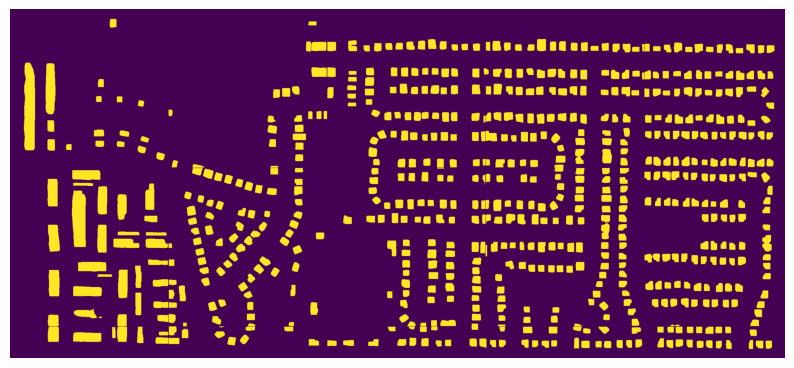

In [4]:
geoai.view_image(maks_path)

In [6]:
geoai.create_split_map(
    left_layer = masks_url,
    right_layer = naip_url,
    left_label = "Building Masks",
    right_label = "NAIP Image",
    left_args = {
        'colormap' : {'255':'#0000ff'},
        
    },
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Convert Raster to Vector

In [7]:
gdf = geoai.raster_to_vector(maks_path, output_path='naip_building_masks.geojson')


Vectorized data saved to naip_building_masks.geojson


In [8]:
geoai.view_vector_interactive(gdf,style={
    'color': 'blue',
    'fillColor': 'blue',
    'weight': 1,
    'fillOpacity': 0.5,
}, tiles = naip_url)

In [9]:
geoai.create_split_map(
    left_layer=gdf,
    right_layer=naip_url,
    left_label="Building Masks",
    right_label="NAIP Image",   
    left_args = {
        'style': {
            'color': 'blue',
            'fillColor': 'blue',
            'weight': 1,
            'fillOpacity': 0.5,
        }
    },
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Now applying Building Regularization Techniques

In [10]:
# Technique #1 
gdf_regularized = geoai.regularization(building_polygons=gdf,
                                       angle_tolerance=10,
                                       simplify_tolerance=0.5,
                                       orthogonalize=True,
                                       preserve_topology=True,
    )

In [11]:
geoai.view_vector_interactive(gdf_regularized, style={
    'color': 'red',
    'fillColor': 'red',
    'weight': 1,
    'fillOpacity': 0.5,
}, tiles=naip_url)

In [12]:
geoai.create_split_map(
    left_layer=gdf_regularized,
    right_layer=naip_url,
    left_label="Regularized Building Masks",
    right_label="NAIP Image",
    left_args={
        'style': {
            'color': 'red',
            'fillColor': 'red',
            'weight': 1,
            'fillOpacity': 0.5,
        }
    },
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Technique 2 : Hybrid Regularization 


In [17]:
gdf_hybrid = geoai.hybrid_regularization(gdf)

In [18]:
geoai.view_vector_interactive(gdf_regularized, style={
    'color': 'green',
    'fillColor': 'green',
    'weight': 1,
    'fillOpacity': 0.5,
}, tiles=naip_url)

In [19]:
geoai.create_split_map(left_layer=gdf_hybrid,
                       right_layer=naip_url,
                       left_label="Hybrid Regularized Building Masks",
                       right_label="NAIP Image",
                       left_args={
                           'style': {
                               'color': 'green',
                               'fillColor': 'green',
                               'weight': 1,
                               'fillOpacity': 0.5,
                           }
                       },
                       basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Technique 3 Adaptive Regularization

In [20]:
gdf_adaptive = geoai.adaptive_regularization(building_polygons=gdf,
                                             simplify_tolerance=0.5,
                                             area_threshold=0.9,
                                             preserve_shape=True,
                                             )

In [21]:
geoai.view_vector_interactive(gdf_adaptive, style={
    'color': 'yellow',
    'fillColor': 'yellow',
    'weight': 1,
    'fillOpacity': 0.5,
}, tiles=naip_url)

In [22]:
geoai.create_split_map(
    left_layer=gdf_adaptive,
    right_layer=naip_url,
    left_label="Adaptive Regularized Building Masks",
    right_label="NAIP Image",
    left_args={
        'style': {
            'color': 'yellow',
            'fillColor': 'yellow',
            'weight': 1,
            'fillOpacity': 0.5,
        }
    },
    basemap=naip_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Comparing All 3 Regularization Together

In [23]:
import leafmap.foliumap as leafmap

In [26]:
m = leafmap.Map()
#m.add_basemap("NAIP Imagery", naip_url)
m.add_cog_layer(naip_url)
m.add_gdf(gdf,layer_name = 'Original')
m.add_gdf(gdf_regularized, layer_name="Regularized Building Masks", style={
    'color': 'red',
    'fillColor': 'red',
    'weight': 1,
    'fillOpacity': 0.5,
})
m.add_gdf(gdf_hybrid, layer_name="Hybrid Regularized Building Masks", style={
    'color': 'green',
    'fillColor': 'green',
    'weight': 1,
    'fillOpacity': 0.5,
})
m.add_gdf(gdf_adaptive, layer_name="Adaptive Regularized Building Masks", style={
    'color': 'yellow',
    'fillColor': 'yellow',
    'weight': 1,
    'fillOpacity': 0.5,
})
legend_dict={
        "Original" : "blue",
        "Regularized Building Masks": "red",
        "Hybrid Regularized Building Masks": "green",
        "Adaptive Regularized Building Masks": "yellow",
    }
m.add_legend(title = 'Building Footprints', legend_dict=legend_dict)
    
